# Setup

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import re
import emoji
import ftfy
import unicodedata
import string
from langdetect import detect, DetectorFactory

from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

DetectorFactory.seed = 42  # make results stable
np.random.seed(42)
filterwarnings("ignore")
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Dataset

In [2]:
PATH='../data/raw/cyberbullying_tweets.csv'
data = pd.read_csv(PATH)

In [3]:
def summary(df):
  print(f'Shape: {df.shape}')

  print(f'\nFeatures:')
  for i, col in enumerate(df.columns):
      print(f'  {i+1}. {col}')
  print()

  print("Summary: ")

  summ = pd.DataFrame({
     'Dtype': df.dtypes,
     'Total Missing': df.isnull().sum(),
     'Total Missing (%)': df.isnull().sum() / len(df) * 100,
      'Unique Values': df.nunique(),
  })
  display(summ)

  print('\nSample Data:')
  display(df.sample(5, random_state=42))

summary(data)

Shape: (47692, 2)

Features:
  1. tweet_text
  2. cyberbullying_type

Summary: 


,Dtype,Total Missing,Total Missing (%),Unique Values
tweet_text,object,0,0.0,46017
cyberbullying_type,object,0,0.0,6



Sample Data:


,tweet_text,cyberbullying_type
40362,@Goree_JuhssGuns hahaha he ain't even worth my...,ethnicity
15019,RT @hsaymssik: Sucks to have the smile wiped o...,gender
46321,"Just a reminder, it's absolutely disgusting to...",ethnicity
23927,RT @BuzzFeedUK: When you accidentally open you...,other_cyberbullying
1640,Loving the look of the fritters! #mkr,not_cyberbullying


In [4]:
data.describe(include='all').T

,count,unique,top,freq
tweet_text,47692,46017,@stockputout everything but mostly my priest,2
cyberbullying_type,47692,6,religion,7998


In [5]:
LABEL = 'cyberbullying_type'

In [6]:
print(f'Total duplicates: {data.duplicated().sum()}')

Total duplicates: 36


In [7]:
# drop duplicates
data.drop_duplicates(inplace=True)

# EDA

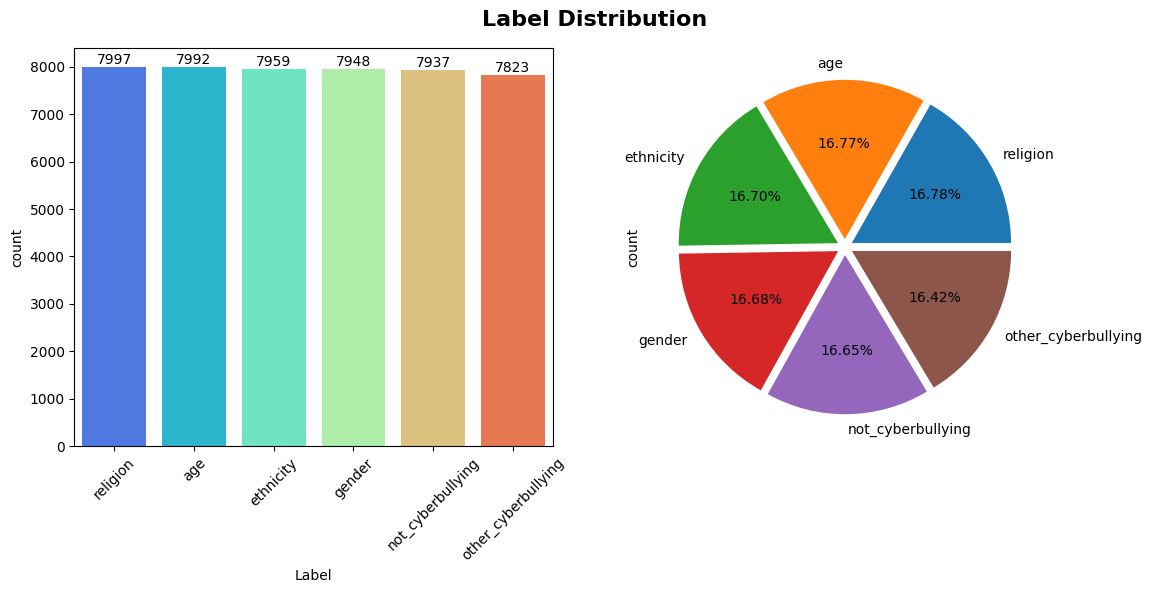

In [8]:
plt.figure(figsize=(12,6))
plt.suptitle('Label Distribution', fontsize=16,fontweight='bold')
plt.subplot(1,2,1)
ax = sns.countplot(data = data, x = LABEL, palette='rainbow', order=data[LABEL].value_counts().index)
for bar in ax.containers:
    ax.bar_label(bar)
plt.xlabel('Label')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
data[LABEL].value_counts().plot.pie(
    autopct="%.2f%%",
    labels=data[LABEL].value_counts().index,
    explode=[0.05]*data[LABEL].nunique(),
)
plt.tight_layout()
plt.show()

## Cleaned

In [8]:
emoji_pattern = re.compile( "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
print("Total Emojis found in the dataset: ", len(emoji_pattern.findall(" ".join(data['tweet_text']))))

Total Emojis found in the dataset:  614


In [9]:
emoji_pattern.findall(" ".join(data['tweet_text']))  # display first 10 emojis found

['😘❤',
 '😌',
 '🍋🍋🍋',
 '😭😭😭',
 '♥',
 '❤️',
 '👏👏👏👏👏',
 '😁🙏',
 '♥',
 '😂',
 '😏😏😏',
 '😝',
 '😒',
 '😄',
 '😂',
 '☹',
 '🎁',
 '☺♥',
 '🙅🙅🙅🙅🙅',
 '😍👌',
 '🎶🎶',
 '😂😂',
 '😷',
 '😱',
 '😱',
 '😱😰😅😜😀😩😨😱😱',
 '👍',
 '♥',
 '☺',
 '♥',
 '❤',
 '😘',
 '👎😩',
 '😉',
 '💩',
 '👍☺',
 '💔👎',
 '🏀',
 '💅💁',
 '😃',
 '😔😢😐😊😍😘❤',
 '👍',
 '😁✌️',
 '😱🙈🙀💉',
 '♥',
 '😲🔫',
 '😦',
 '😡🔫',
 '☺',
 '🙏',
 '👍',
 '😋😋',
 '👍',
 '🐚',
 '😴',
 '😍',
 '😴😓',
 '👌',
 '😒',
 '👎',
 '\ue022',
 '👳',
 '😜😍',
 '🍴',
 '♥',
 '🙏',
 '👍👌👏',
 '♥',
 '♥',
 '👌👠👗❌',
 '😘😍',
 '😜',
 '🐧🐧🐧🐧🐧🐧😃',
 '🎧🎵',
 '😏',
 '❤',
 '😂😂',
 '💦💦',
 '😂',
 '😆😈😆',
 '😒',
 '😒',
 '😌',
 '💙👯',
 '😟',
 '😠',
 '❤️❤️',
 '👏💐',
 '♥',
 '😜',
 '😤',
 '❤️',
 '👍',
 '👌✨',
 '😂😂😂😂😂',
 'なぁなぁパンツちょーだいパンツ。パンツくれよ！パンツくれよォ！パンツくれよお前！パンツくらいええやないか！！おいっパンツくれ！！！\u3000（',
 '・',
 '）',
 '❤',
 '😡😤',
 '😂',
 '😃😃',
 '👉👉👉👉',
 '😤',
 '👌',
 '😜📷',
 '😧📱🔫',
 '😷😵',
 '😆',
 '💋💬👔✨',
 '♥',
 '👿',
 '😋😋',
 '🙅',
 '❤️',
 '☺️',
 '🍩🍩🍩',
 '😷',
 '♪♥♪',
 '♥',
 '☑',
 '👏👏',
 '💁',
 '😂😂😂',
 '😁',
 '😱',
 '\uf04a\uf04a',
 '🕡🕟🕠🕞🕥🕗🕛',
 '😂🙌🙌',
 '😰',
 '❤️❤️',
 '🍗🍗🍗',
 '😡',
 '😉

In [10]:
def demojize_emoji(text):
    emoji_pattern = re.compile(
        "["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE
       )
    return emoji_pattern.sub(lambda x: re.sub(r'[\W_]', " ",emoji.demojize(x.group())), text)

text = "I love programming! 😍💻"

# example usage
demojized_text = demojize_emoji(text)
print("Original Text: ", text)
print("Demojized Text: ", demojized_text)

Original Text:  I love programming! 😍💻
Demojized Text:  I love programming!  smiling face with heart eyes  laptop 


In [11]:
def normalize_unicode(text):
    text = ftfy.fix_text(text)
    return "".join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

# example usage
weird_text = "Café 😊 is coöperation naïve fiancé jalapeño año."
normalized_text = normalize_unicode(weird_text)
print("Original Text: ", weird_text)
print("Normalized Text: ", normalized_text)

Original Text:  Café 😊 is coöperation naïve fiancé jalapeño año.
Normalized Text:  Cafe 😊 is cooperation naive fiance jalapeno ano.


In [12]:
def remove_mentions(text):
    if re.search(r'@\w+', text):
        text = re.sub(r'@\w+', ' ', text)
    if re.search(r'#\w+', text):
        text = re.sub(r'#\w+', ' ', text)
    return text

In [13]:
def cleaned_text(text):
    text = normalize_unicode(text)
    text = demojize_emoji(text)
    text = remove_mentions(text)
    text = text.lower()
    text = re.sub(r'\b(im)\s', 'i am ', text)
    text = re.sub(r"can\'t|can t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"it's|it s", "it is", text)
    text = re.sub(r"i'm|i m", "i am", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub("gonna|gon na", "going to", text)
    text = re.sub("wanna|wan na", "want to", text)
    text = re.sub(r"\brn\b", "right now", text)
    text = re.sub(r"\bidk\b", "i dont know", text)
    text = re.sub(r"http?://\S+|www\.\S+|https?://\S+|pic\.twitter\.com/\S+", '', text)
    text = "".join([word for word in text if not word in string.punctuation])
    text = re.sub('[\n\t\r]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text.strip()

def cleaned_df(df):
    df = df.copy()
    df['cleaned_text'] = df['tweet_text'].apply(cleaned_text)
    condition_to_drop = (df['cleaned_text'].str.strip() == '') | (df['cleaned_text'].isnull())
    df = df[~condition_to_drop].reset_index(drop=True)
    return df


    

In [14]:
sample_text = data['tweet_text'].sample(5).tolist()
print("Random tweet text: ")
for i, text in enumerate(sample_text, 1):
  print(f"{i}: {text}")

cleaned_sample = [cleaned_text(t) for t in sample_text]
print("Random cleaned tweet text: ")
for i, text in enumerate(cleaned_sample, 1):
  print(f"{i}: {text}")

Random tweet text: 
1: Yup there still hot blondes #mkr
2: alissa violet rlly said "it's everyday bro w the same bully flow bully at school now your bullying your bro" and set the standard for the entire year of 2017
3: Ever get #bullied for being fat? Porky gets her revenge: http://t.co/dJTuOsX
4: @FarooqSumar @NafeezAhmed @MaxBlumenthal Wrong again. Islam = Nazism.  And Muslim murderers have exterminated Jews.
5: RT @thetrudz: And, it is comical for Emma to mention "male gaze" re: Bey, when her speech CENTERED men and was not intersectional. https://…
Random cleaned tweet text: 
1: yup there still hot blondes
2: alissa violet rlly said it is everyday bro w the same bully flow bully at school now your bullying your bro and set the standard for the entire year of 2017
3: ever get for being fat porky gets her revenge
4: wrong again islam nazism and muslim murderers have exterminated jews
5: rt and it is comical for emma to mention male gaze re bey when her speech centered men and was no

In [15]:
data_cleaned = cleaned_df(data)
summary(data_cleaned)

Shape: (47316, 3)

Features:
  1. tweet_text
  2. cyberbullying_type
  3. cleaned_text

Summary: 


,Dtype,Total Missing,Total Missing (%),Unique Values
tweet_text,object,0,0.0,45695
cyberbullying_type,object,0,0.0,6
cleaned_text,object,0,0.0,44852



Sample Data:


,tweet_text,cyberbullying_type,cleaned_text
8790,"Trans ideology is sexist, misogynistic, and ho...",gender,trans ideology is sexist misogynistic and homo...
16840,Actually no they’re not. A public official can...,religion,actually no they are not a public official can...
32484,The girls who got bullied in high school for b...,age,the girls who got bullied in high school for b...
26051,Someone posted this on facebook in response to...,other_cyberbullying,someone posted this on facebook in response to...
30007,@mala how about this - my next week is still e...,other_cyberbullying,how about this my next week is still empty but...


In [16]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# example usage
text='ハンツくれよハンツくれよォハンツくれよお前ハンツくらいええやないかおいっハンツくれ'
detect_language(text)

'ja'

In [17]:
# check total languages
def check_languages(df):
    df['language'] = df['cleaned_text'].apply(lambda x: detect_language(x))
    lang_counts = df['language'].value_counts()
    print(f'Total languages detected: {len(lang_counts)}')
    print()
    print("List of languages detected:")
    display(lang_counts)
check_languages(data_cleaned)
    

Total languages detected: 33

List of languages detected:


language
en         44094
pt           321
so           265
af           260
cy           230
da           203
no           186
it           180
fr           162
id           155
es           146
tl           140
ca           117
sv           112
et           112
tr           100
fi            84
nl            76
sw            71
hr            45
ro            42
sq            33
sl            28
pl            27
cs            24
de            22
sk            18
unknown       16
hu            14
lv            11
lt            11
vi             7
ja             4
Name: count, dtype: int64

In [29]:
data_cleaned[data_cleaned['language'] == 'so']

,tweet_text,cyberbullying_type,cleaned_text,language
11,Ughhhh #MKR,not_cyberbullying,ughhhh,so
176,@classic_KZ @kevin_kohout @sbroph93 @BillDolla...,not_cyberbullying,todays the day maafucks,so
216,@Paigey_x hahaha we will see #doubtful,not_cyberbullying,hahaha we will see,so
270,Hello birthday week!,not_cyberbullying,hello birthday week,so
363,@AlwaysWrightHoe LMFAOOOOOOOOOOOOOOOOOOOOOOOOO...,not_cyberbullying,lmfaoooooooooooooooooooooooooo bruh stop,so
...,...,...,...,...
46447,Hahaha they mad as fuck yal ---&gt; RT @tayyou...,ethnicity,hahaha they mad as fuck yal rt fuck obama dumb...,so
46488,"@tayyoung_: FUCK OBAMA, dumb ass nigger ctfuuu...",ethnicity,fuck obama dumb ass nigger ctfuuuu bitch yu ma...,so
46584,"“@tayyoung_: FUCK OBAMA, dumb ass nigger” you ...",ethnicity,fuck obama dumb ass nigger you mad stay mad,so
46604,"@tayyoung_: FUCK OBAMA, dumb ass nigger Ha you...",ethnicity,fuck obama dumb ass nigger ha you mad oh okay lol,so


## Wordclouds Viz

In [21]:
STOPWORDS = stopwords.words('english')

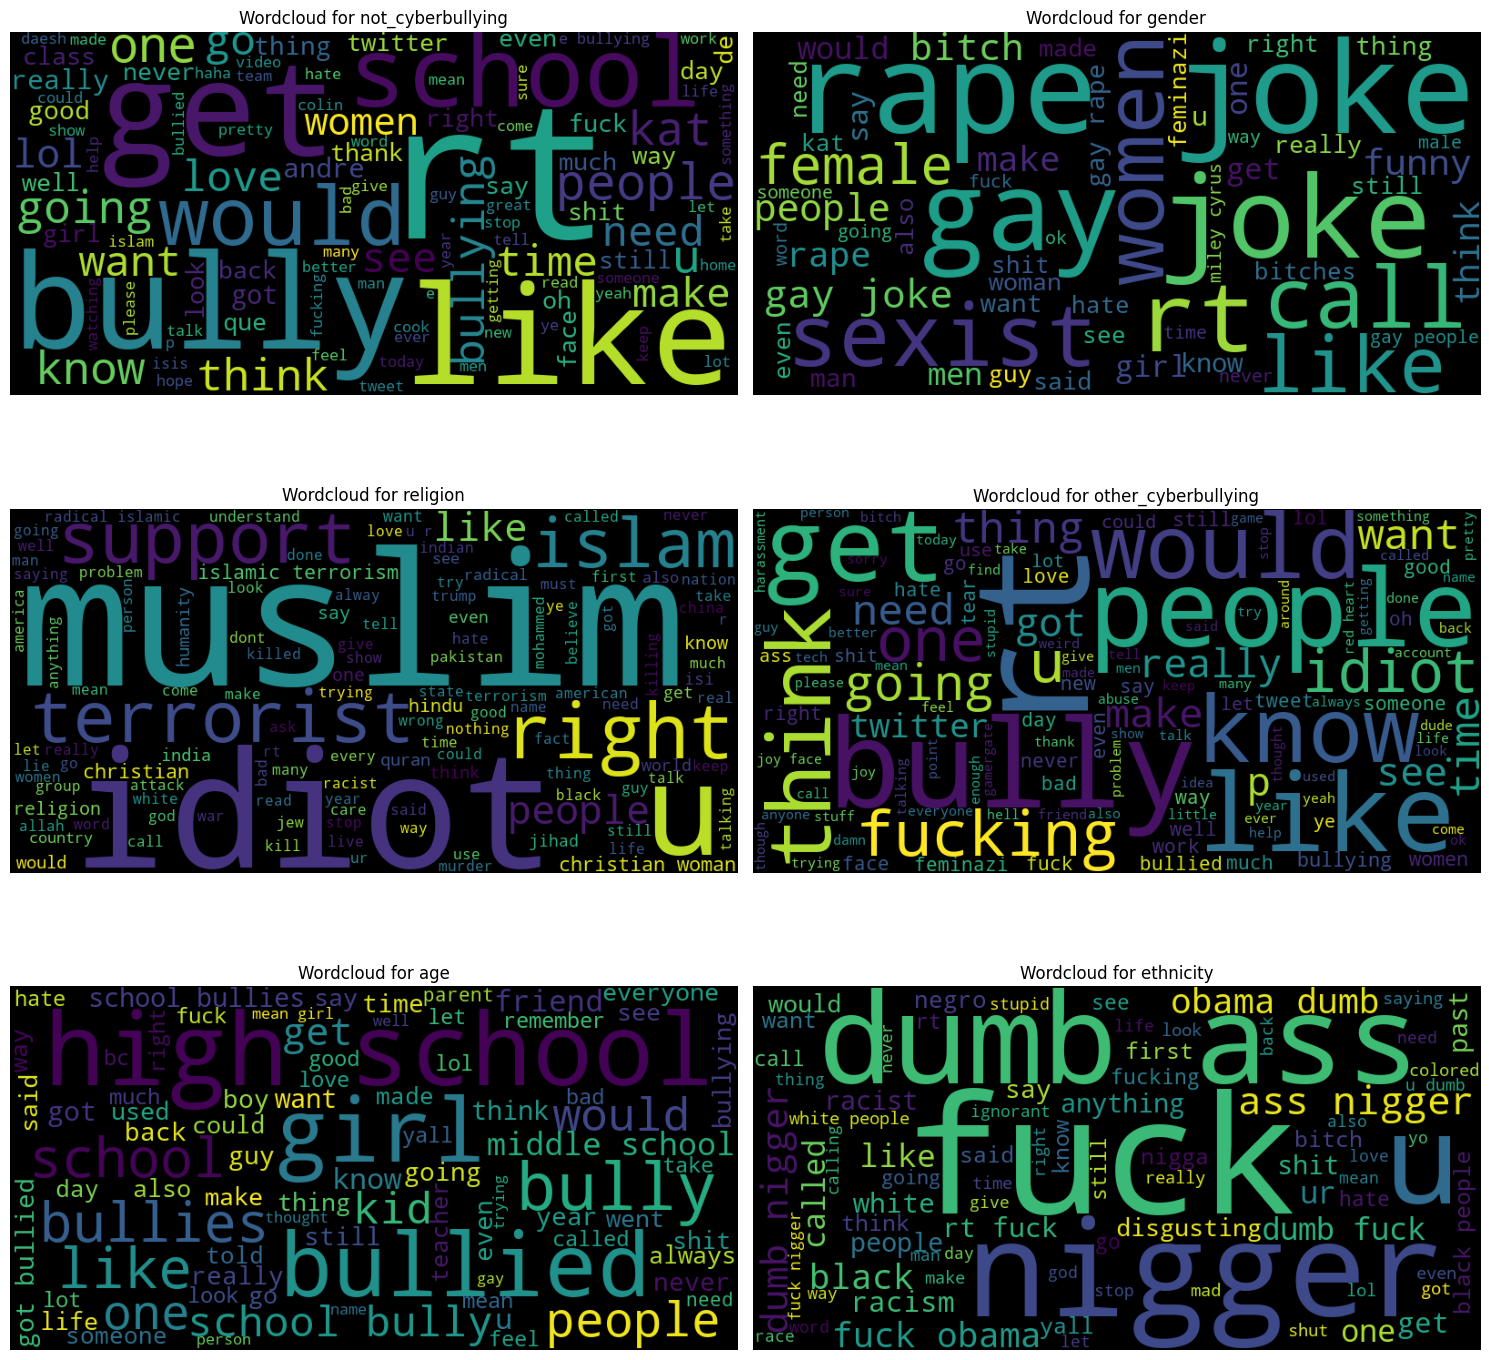

In [25]:
def wordcloud_plot(df, LABEL):
  label_unique = df[LABEL].unique()
  length = len(label_unique)
  cols = 2
  rows = length // cols + (length % cols > 0)
  plt.figure(figsize=(15, 5 * rows))
  for i, label in enumerate(label_unique, 1):
    plt.subplot(rows, cols, i)
    plt.title(f"Wordcloud for {label}")
    text = " ".join(df[df[LABEL] == label]['cleaned_text'])
    pos_wordcloud = WordCloud(
        background_color='black',
        height=400,
        width=800,
        stopwords=STOPWORDS,
        min_font_size=15
    ).generate(text)
    plt.imshow(pos_wordcloud)
    plt.axis('off')
  plt.tight_layout()
  plt.show

wordcloud_plot(data_cleaned, LABEL)

1: not_cyberbullying - 57012 words


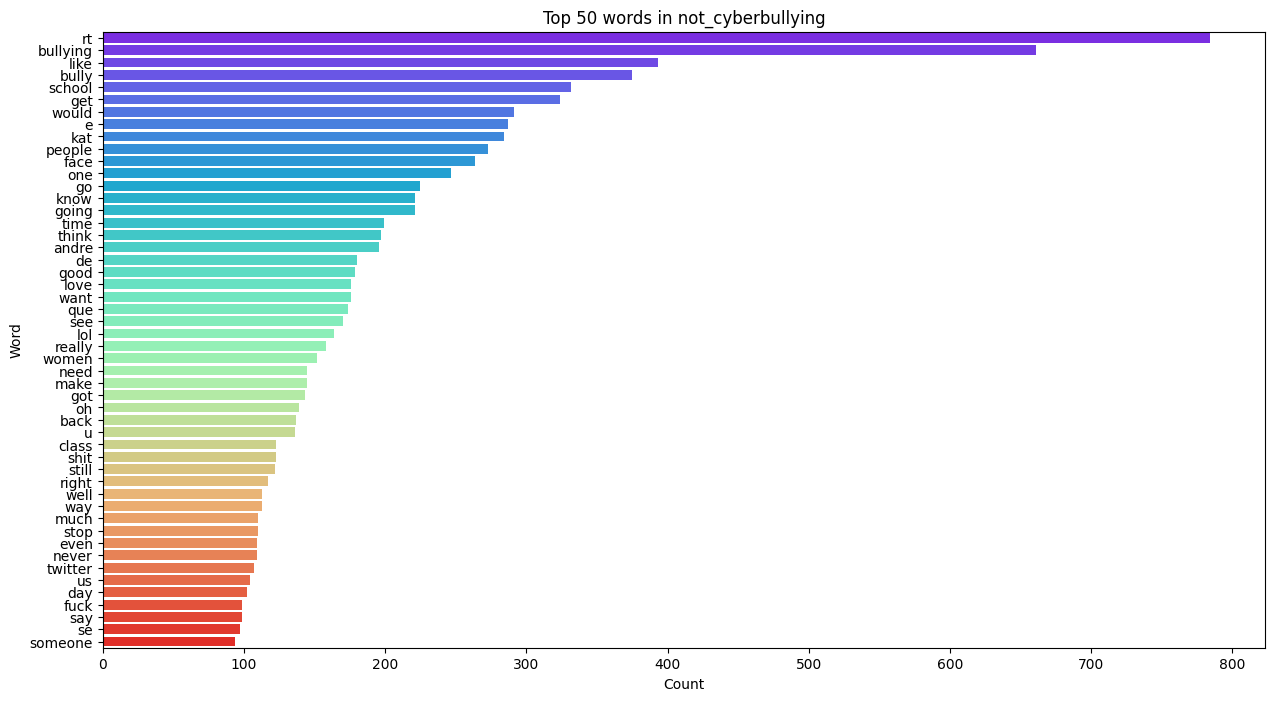

2: gender - 101379 words


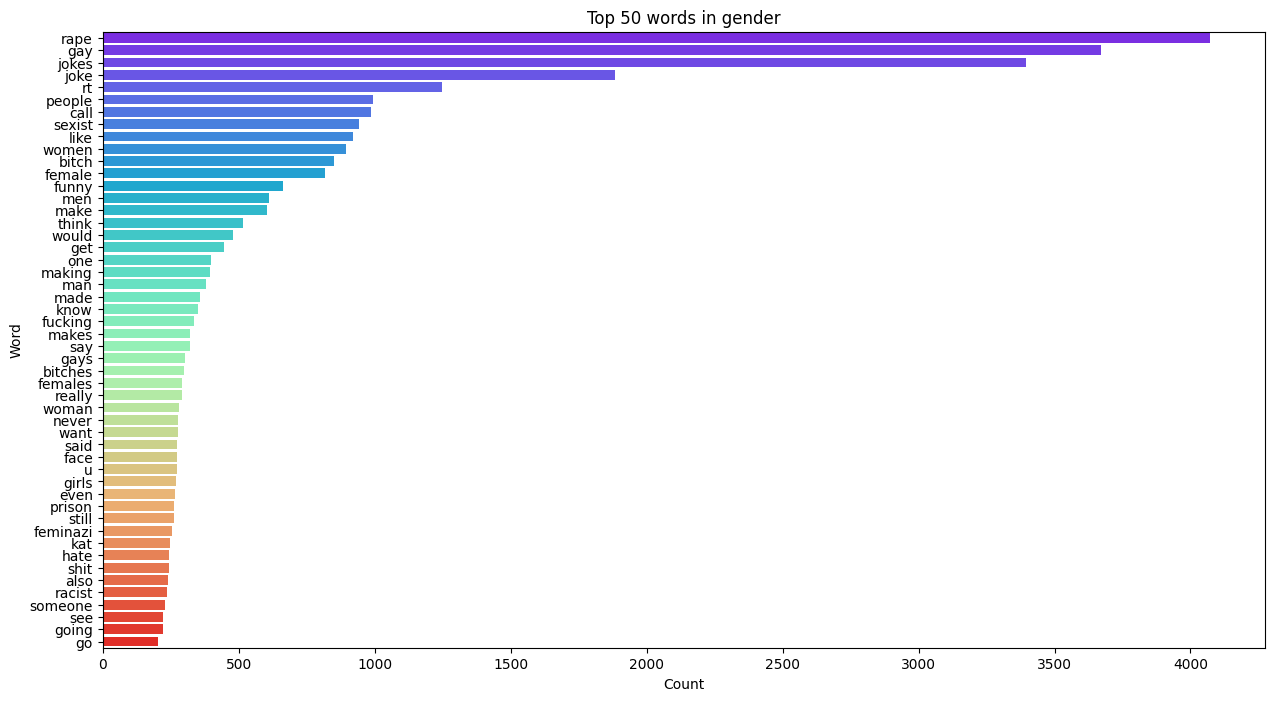

3: religion - 141354 words


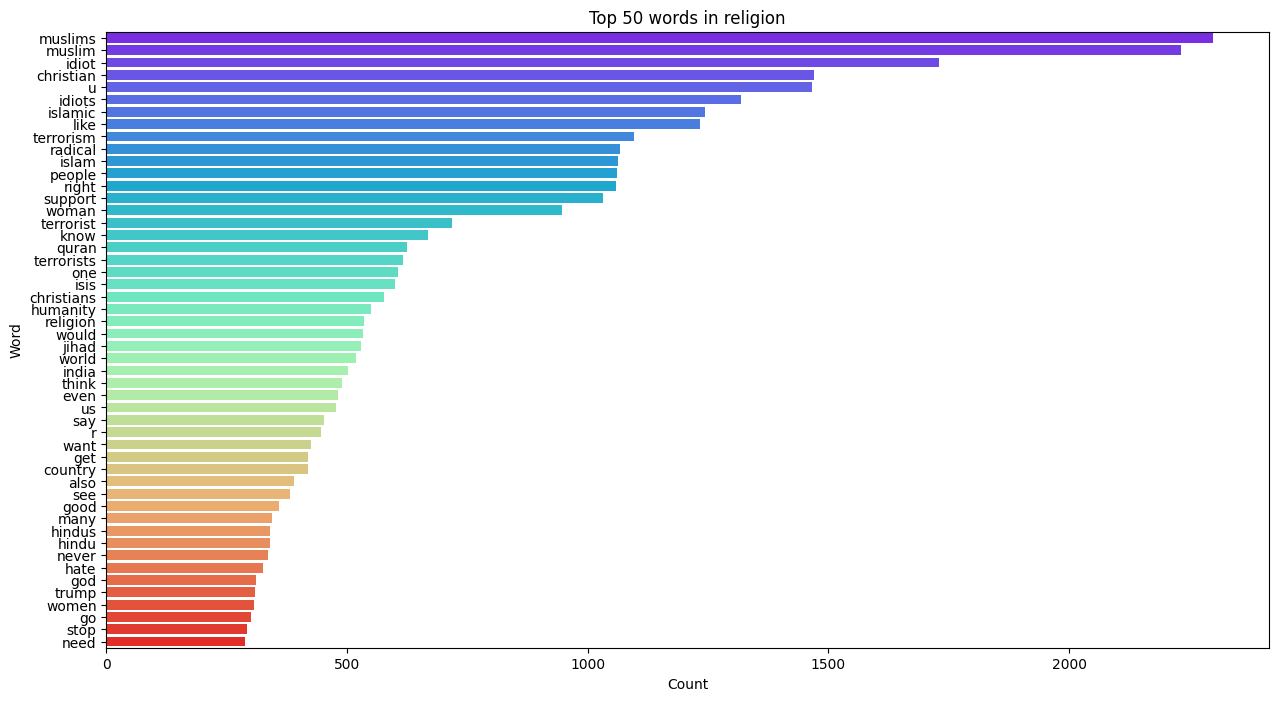

4: other_cyberbullying - 54378 words


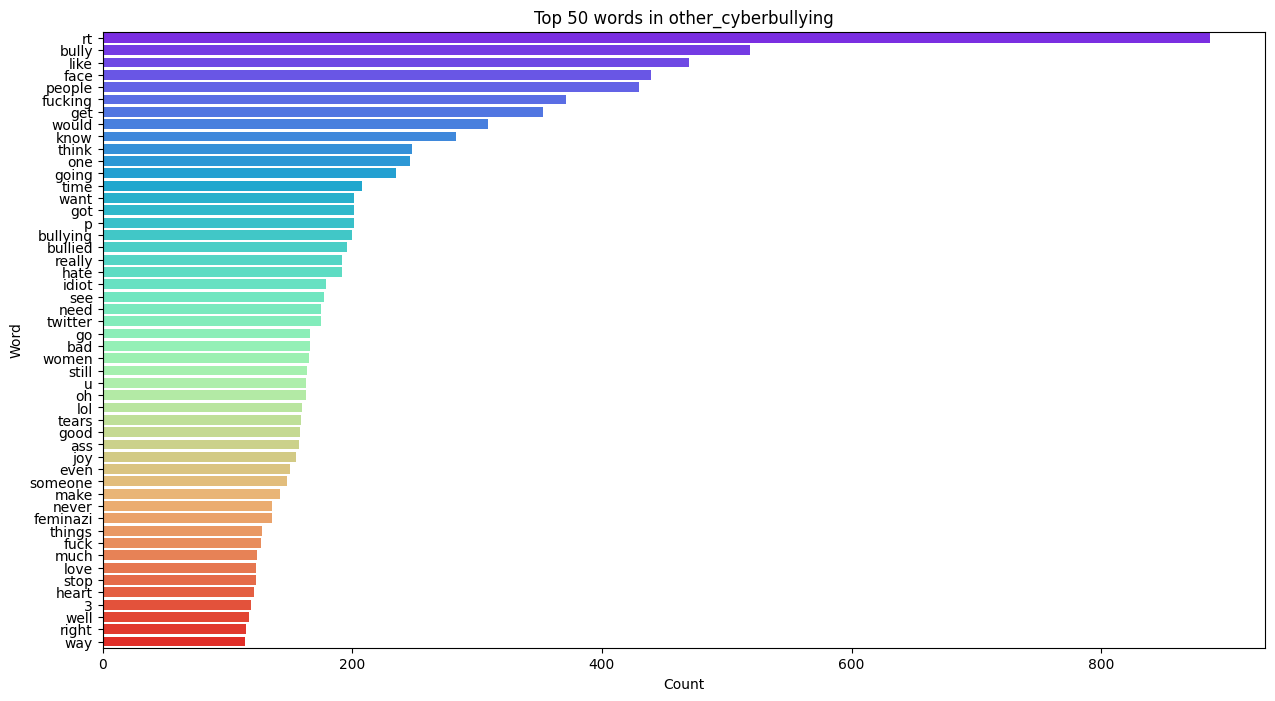

5: age - 133346 words


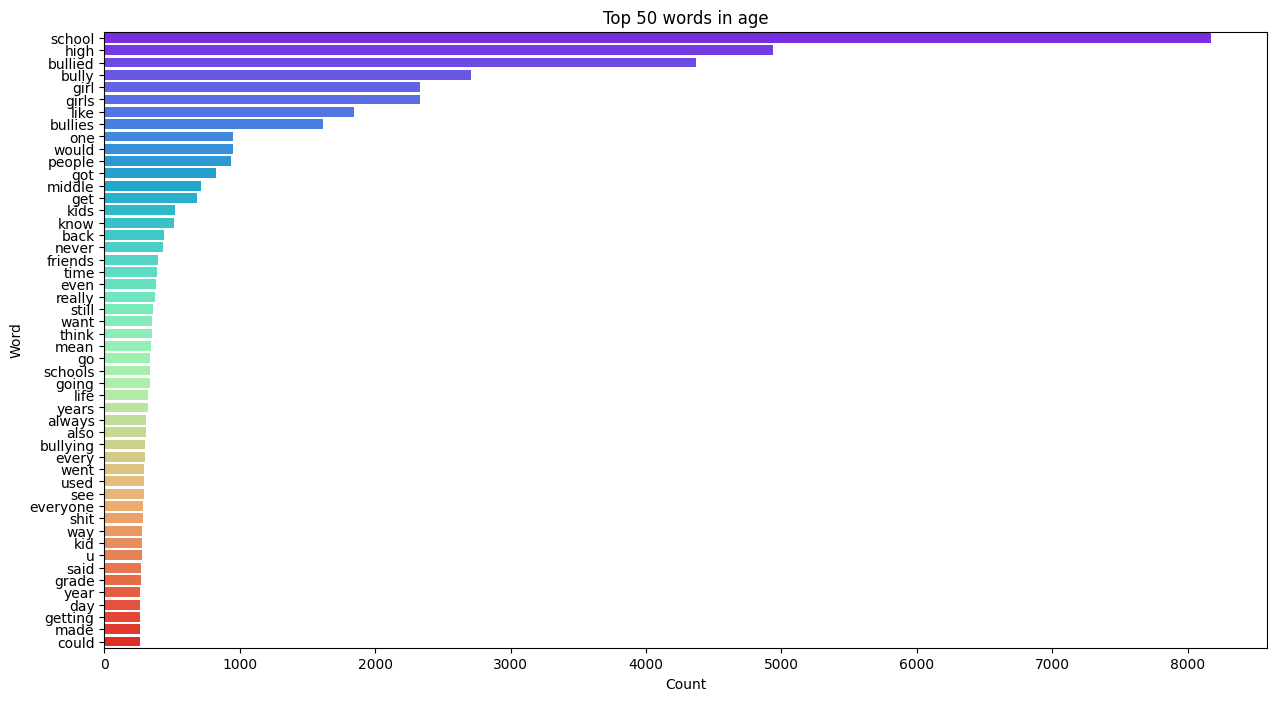

6: ethnicity - 114450 words


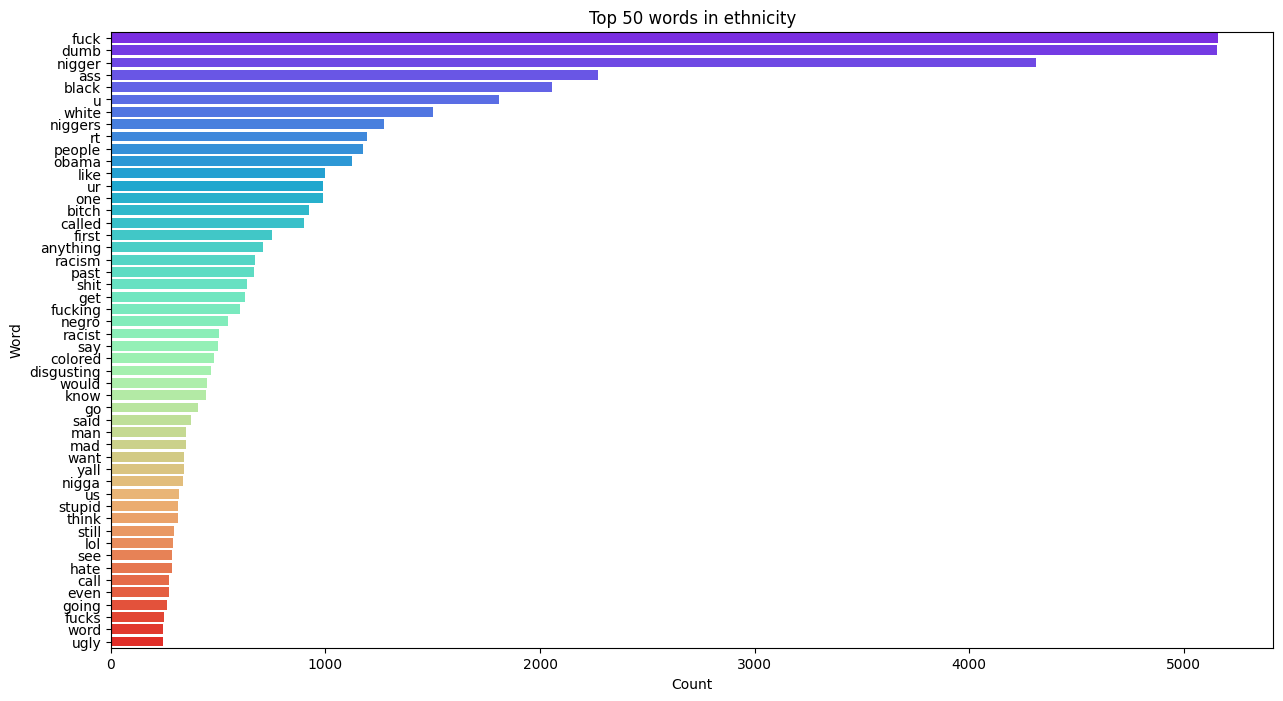

In [28]:
def make_corpus(df, label):
  corpus = []
  for text in df.loc[df[LABEL] == label, 'cleaned_text'].str.split():
    for word in text:
      if word not in STOPWORDS:
        corpus.append(word)
  return corpus

for i, label in enumerate(data_cleaned[LABEL].unique(), 1):
  print(f"{i}: {label} - {len(make_corpus(data_cleaned, label))} words")
  counter = Counter(make_corpus(data_cleaned, label))
  mc = counter.most_common()

  w,c = [], []

  for word, count in mc[:50]:
    w.append(word)
    c.append(count)

  plt.figure(figsize=(15, 8))
  sns.barplot(x = c, y = w, palette='rainbow')
  plt.title(f"Top 50 words in {label}")
  plt.xlabel('Count')
  plt.ylabel('Word')
  plt.show()

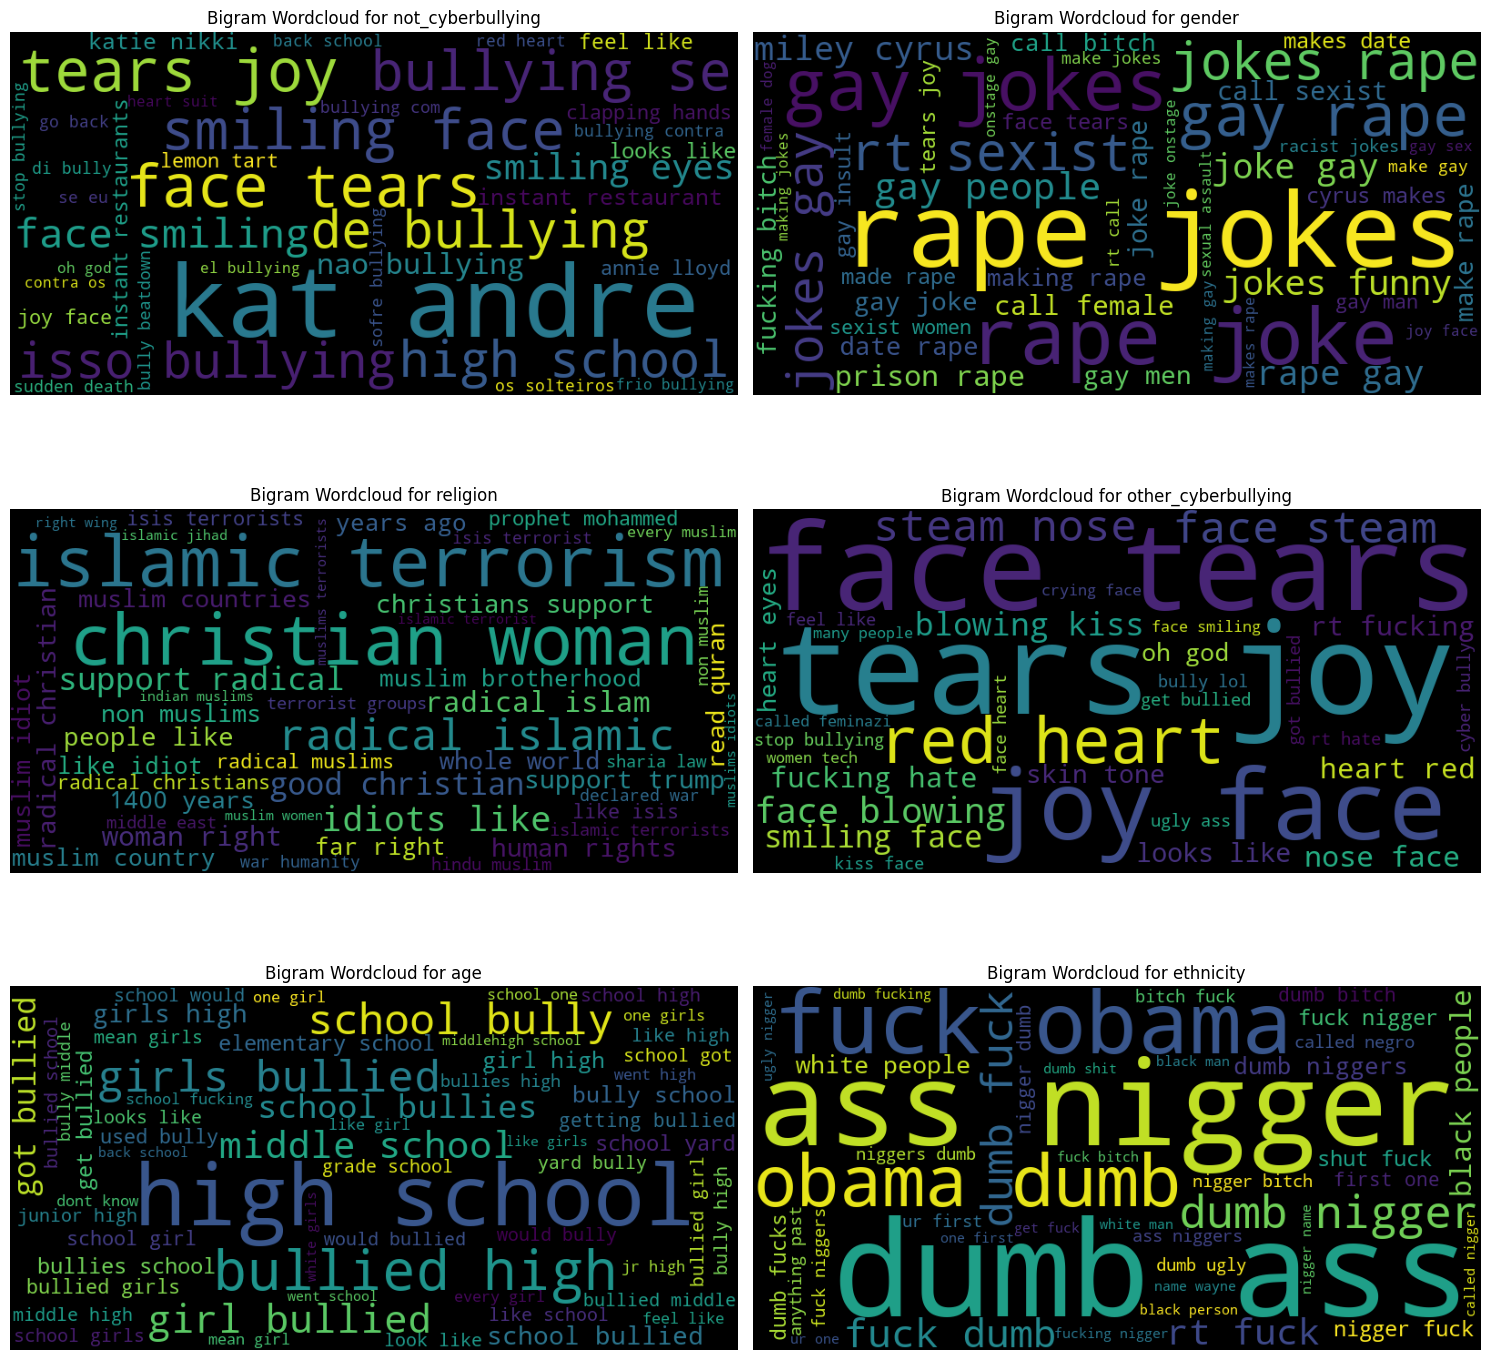

In [31]:
# wordcloud for bigram
from sklearn.feature_extraction.text import CountVectorizer

def wordcloud_plot_bigram(df, LABEL):
    label_unique = df[LABEL].unique()
    length = len(label_unique)
    cols = 2
    rows = length // cols + (length % cols > 0)
    plt.figure(figsize=(15, 5 * rows))
    for i, label in enumerate(label_unique, 1):
        plt.subplot(rows, cols, i)
        plt.title(f"Bigram Wordcloud for {label}")
        text = df[df[LABEL] == label]['cleaned_text']
        vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=STOPWORDS)
        X = vectorizer.fit_transform(text)
        sum_words = X.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        wordcloud = WordCloud(
            background_color='black',
            height=400,
            width=800,
            min_font_size=15
        ).generate_from_frequencies(dict(words_freq))
        plt.imshow(wordcloud)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
   
wordcloud_plot_bigram(data_cleaned, LABEL)

# Feature Engineering

In [32]:
data_cleaned['length'] = data_cleaned['cleaned_text'].apply(len)
data_cleaned.groupby(LABEL)['length'].describe().T

cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,167.161787,124.011318,119.310794,65.879846,69.186454,181.424659
std,76.830534,77.104183,71.666095,40.803054,76.551944,75.436404
min,10.000000,5.000000,1.000000,1.000000,1.000000,2.000000
25%,101.000000,69.000000,71.000000,36.000000,34.000000,109.000000
50%,165.000000,105.000000,105.000000,62.000000,65.000000,197.000000
75%,242.000000,156.000000,137.000000,94.000000,101.000000,255.000000
max,1459.000000,1593.000000,1133.000000,1470.000000,3888.000000,486.000000


In [35]:
def create_features(df):
    tokenizer = RegexpTokenizer(r'\w+')
    df['contains_num'] = df['tweet_text'].apply(lambda x: 1 if re.search(r'\d', x) else 0)
    df['capital_ratio'] = df['tweet_text'].apply(
        lambda x: sum(1 for c in x if c.isupper()) / sum(1 for c in x if c.isalpha()) 
        if any(c.isalpha() for c in x) else 0
    )
    df['word_count'] = df['tweet_text'].apply(lambda x: len(tokenizer.tokenize(x)))
    df['avg_word_length'] = df['tweet_text'].apply(
        lambda x: np.mean([len(word) for word in word_tokenize(x)]) 
        if len(word_tokenize(x)) > 0 else 0
    )
    df['sentence_count'] = df['tweet_text'].apply(lambda x: len(sent_tokenize(x)))
    df['avg_sentence_length'] = df['tweet_text'].apply(
        lambda x: np.mean([len(sentence.split()) for sentence in sent_tokenize(x)]) 
        if len(sent_tokenize(x)) > 0 else 0
    )

    def hapax_legomena_ratio(text):
        tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
        counts = Counter(tokens)
        hapax = sum(1 for w, c in counts.items() if c == 1)
        return hapax / len(tokens) if len(tokens) > 0 else 0

    df["hapax_ratio"] = df["tweet_text"].apply(hapax_legomena_ratio)

    def type_token_ratio(text):
        tokens = [w.lower() for w in word_tokenize(text) if w.isalpha()]
        return len(set(tokens)) / len(tokens) if len(tokens) > 0 else 0

    df["ttr"] = df["tweet_text"].apply(type_token_ratio)

    def elongated_count(text):
        tokens = word_tokenize(text.lower())
        return sum(1 for w in tokens if re.search(r"(.)\1{2,}", w))  

    df["elongated_count"] = df["tweet_text"].apply(elongated_count)

    return df
data_cleaned = create_features(data_cleaned)
data_cleaned.head()
    
    



,tweet_text,cyberbullying_type,cleaned_text,language,length,contains_num,capital_ratio,word_count,avg_word_length,sentence_count,avg_sentence_length,hapax_ratio,ttr,elongated_count
0,"In other words #katandandre, your food was cra...",not_cyberbullying,in other words your food was crapilicious,en,41,0,0.020408,9,4.076923,2,4.5,1.000000,1.000000,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,why is so white,en,15,1,0.134831,14,4.080000,2,7.0,1.000000,1.000000,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,a classy whore or more red velvet cupcakes,en,42,0,0.061224,9,4.333333,2,4.5,1.000000,1.000000,1
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks for the heads up but not too conc...,en,87,0,0.037975,18,3.695652,2,9.0,1.000000,1.000000,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,this is an isis account pretending to be a kur...,en,84,0,0.123457,18,3.863636,2,9.0,0.777778,0.888889,0


In [37]:
numeric_features = [
    'length', 'contains_num', 'capital_ratio', 'word_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length',
    'hapax_ratio', 'ttr', 'elongated_count'
]

for col in numeric_features:
    print(f"{col}:")
    display(data_cleaned.groupby(LABEL)[col].describe().T)

length:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,167.161787,124.011318,119.310794,65.879846,69.186454,181.424659
std,76.830534,77.104183,71.666095,40.803054,76.551944,75.436404
min,10.000000,5.000000,1.000000,1.000000,1.000000,2.000000
25%,101.000000,69.000000,71.000000,36.000000,34.000000,109.000000
50%,165.000000,105.000000,105.000000,62.000000,65.000000,197.000000
75%,242.000000,156.000000,137.000000,94.000000,101.000000,255.000000
max,1459.000000,1593.000000,1133.000000,1470.000000,3888.000000,486.000000


contains_num:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,0.184685,0.258300,0.283114,0.291107,0.285303,0.278855
std,0.388066,0.437727,0.450540,0.454302,0.451588,0.448464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


capital_ratio:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,0.046059,0.124609,0.073904,0.098692,0.096894,0.069134
std,0.112332,0.193788,0.104363,0.131944,0.148915,0.095600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011173,0.023988,0.022857,0.031915,0.025237,0.031579
50%,0.024331,0.053571,0.047207,0.064516,0.054995,0.048780
75%,0.042056,0.136364,0.088889,0.117647,0.108108,0.074766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


word_count:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,33.357357,25.844064,25.176694,14.563660,15.377615,34.710266
std,15.387586,14.851576,13.633922,8.058257,16.286741,13.632741
min,2.000000,3.000000,0.000000,0.000000,0.000000,2.000000
25%,20.000000,16.000000,16.000000,9.000000,9.000000,22.000000
50%,33.000000,23.000000,23.000000,14.000000,15.000000,37.000000
75%,47.000000,32.000000,30.000000,20.000000,21.000000,47.000000
max,282.000000,348.000000,247.000000,305.000000,863.000000,98.000000


avg_word_length:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,3.915915,3.868536,3.989536,4.058473,4.042803,4.266713
std,0.586921,0.625977,0.986018,1.327575,1.080448,0.671905
min,2.333333,1.791667,1.666667,1.000000,1.000000,2.000000
25%,3.560000,3.484375,3.515152,3.500000,3.500000,3.864407
50%,3.842621,3.794495,3.857143,3.961538,3.933333,4.187500
75%,4.151680,4.150236,4.280513,4.500000,4.434783,4.568627
max,10.058824,11.333333,55.000000,86.000000,51.000000,18.666667


sentence_count:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,2.143769,2.069794,2.002149,1.679207,1.796156,2.623609
std,1.440507,1.361021,1.301913,0.906901,1.523162,1.557031
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,4.000000
max,19.000000,22.000000,18.000000,21.000000,68.000000,17.000000


avg_sentence_length:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,18.711272,14.703848,14.277884,9.493728,9.158238,16.234733
std,11.141498,9.551232,8.887036,5.670378,5.796047,10.527286
min,1.250000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11.000000,8.000000,8.000000,5.000000,5.000000,9.200000
50%,15.666667,12.000000,12.000000,8.000000,7.666667,12.750000
75%,23.500000,19.000000,18.333333,12.000000,12.000000,19.500000
max,64.000000,63.000000,62.000000,32.000000,41.000000,59.000000


hapax_ratio:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,0.799934,0.839245,0.844704,0.919879,0.914806,0.789405
std,0.139883,0.139472,0.150795,0.125149,0.131413,0.136206
min,0.016393,0.076923,0.000000,0.000000,0.000000,0.157895
25%,0.700000,0.740000,0.750000,0.857143,0.846154,0.697674
50%,0.800000,0.846154,0.866667,1.000000,1.000000,0.789474
75%,0.904762,1.000000,1.000000,1.000000,1.000000,0.888889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ttr:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,0.887515,0.911105,0.913287,0.956908,0.953301,0.882594
std,0.082915,0.080997,0.091457,0.074408,0.084209,0.079915
min,0.311475,0.440000,0.000000,0.000000,0.000000,0.400000
25%,0.829268,0.857143,0.863636,0.928571,0.923077,0.829787
50%,0.888889,0.920000,0.931034,1.000000,1.000000,0.886364
75%,0.952381,1.000000,1.000000,1.000000,1.000000,0.941176
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


elongated_count:


cyberbullying_type,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
count,7992.000000,7952.000000,7912.000000,7815.000000,7648.000000,7997.000000
mean,0.142142,0.212902,0.190976,0.137812,0.103949,0.177942
std,0.437929,0.547867,0.491160,0.411720,0.367782,0.595106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,7.000000,6.000000,5.000000,8.000000,10.000000


In [36]:
data_cleaned.to_csv('../data/cleaned/cyberbullying_tweets_cleaned.csv', index=False)